# Missing Values

I missing value sono valori che vengono persi nel trasferimento di dati, non registrati o che sono in generale mancanti.

possono essere gestiti in diversi modi:

1. eliminazione
2. riempimento

> eliminazione, semplicemente andiamo ad eliminare l'intera riga in cui è presente un valore mancante (non è largamente utilizzata per l'enorme spreco di dati che genera)

In [1]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},
    {"età": 23, "punteggio": 77, "ammesso": None},
]
df = pd.DataFrame(dataset) #dataframe è una tabella
df

età  punteggio  ammesso
0  25.0       90.0      1.0
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN

1. Dataframe creato
    > _(normalmente si tende ad importarli dall'esterno)_

In [2]:
df['punteggio']

0    90.0
1    85.0
2     NaN
3    75.0
4     NaN
5    77.0
Name: punteggio, dtype: float64

In [3]:
#identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
righe_con_dati_mancanti

età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN

In [4]:
#Conta quante righe con dati mancanti ci sono in totale
totale_dati_mancanti = righe_con_dati_mancanti.shape[0] #0=righe, 1=colonne
totale_dati_mancanti

5

Mostriamo il totale dei dati mancanti

In [5]:
print('righe con dati mancanti:')
print(righe_con_dati_mancanti)
print('Totale dati mancanti: ',totale_dati_mancanti)

righe con dati mancanti:
    età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN
Totale dati mancanti:  5


In [6]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

nome  età  punteggio              email
0    Alice   25       90.0    alice@email.com
1      Bob   22        NaN               None
2  Charlie   28       75.0  charlie@email.com

1. Prendiamo il dataframe e rimpiazziamone le righe sbagliate
    - creiamo un secondo dataframe senza righe sbagliate

In [7]:
#Rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False) #crea un nuovo dataframe in questo caso senza riga
                             #se è true allora sostituisce il nuovo dataframe in generale con quello nuovo
df1

nome  età  punteggio              email
0    Alice   25       90.0    alice@email.com
2  Charlie   28       75.0  charlie@email.com

> Il metodo per riempimento riempe con il valore medio i dati mancanti

1. andiamo a creare un dataframe e importiamo le librerie necessarie per l'analisi dei dati

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()
df

Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN

2. Seleziona le colonne contenenti variabili numeriche

In [9]:
#trattamento dei missing values nelle variabili numeriche
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

Variable1  Variable2
0          1        1.0
1          2        2.0
2          3        NaN
3          4        4.0
4          5        NaN

- mostra le colonne con dati numerici

In [10]:
#trattamento dei missing values nelle variabili numeriche
numeric_cols = df.select_dtypes(include=['number']) #include colonne numeriche e fa vedere solo categoriche
numeric_cols.columns

Index(['Variable1', 'Variable2'], dtype='object')

- sostituisce i valori mancanti con la media e li assegna ad un nuovo dataframe

> assegnare ad un nuovo dataframe è utile per avere quello originale sempre a portata di mano qual'ora sostituissimo o danneggiassimo dati importanti nel processo

In [11]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())
df1

#crea colonne con stessi nomi (var1 e var2) = assegna valori delle colonne df originale(mean=media)

Variable1  Variable2
0          1   1.000000
1          2   2.000000
2          3   2.333333
3          4   4.000000
4          5   2.333333

3. trattamento variabili numeriche e categoriche

    - asseggniamo le variabili categoriche ed esclude i datatype "numbers" (ovvero numeri)

In [12]:
#trattamento dei missing values nelle variabili categoriche
categorical_cols = df.select_dtypes(exclude=['number']) #esclude colonne numeriche e fa vedere solo categoriche
categorical_cols.columns

Index(['Missing_Column'], dtype='object')

- sostituisce i valori mancanti con la media e li assegna ad un nuovo dataframe

> assegnare ad un nuovo dataframe è utile per avere quello originale sempre a portata di mano qual'ora sostituissimo o danneggiassimo dati importanti nel processo

In [13]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean().iloc[1])
df1
#iloc[] = gestisce indici

Variable1  Variable2
0          1   1.000000
1          2   2.000000
2          3   2.333333
3          4   4.000000
4          5   2.333333

Stampa il dataframe

In [14]:
print(f"il primo coi valori mancati \n{df} \ne")

il primo coi valori mancati 
   Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN 
e


## Analisi dei dati

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

Feature1  Feature2  Feature3
0       1.0       NaN       1.0
1       2.0       2.0       NaN
2       NaN       3.0       3.0
3       4.0       4.0       4.0
4       5.0       NaN       5.0

1. Creiamo un dataframe

In [16]:
df.isnull()

Feature1  Feature2  Feature3
0     False      True     False
1     False     False      True
2      True     False     False
3     False     False     False
4     False      True     False

2. Vediamo quanti sono i valori mancanti per ogni colonna

In [17]:
df.isnull().sum()

Feature1    1
Feature2    2
Feature3    1
dtype: int64

3. calcoliamo la percentuale di essi

In [18]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

4. Mostriamo questa percentuale su un grafico a barre

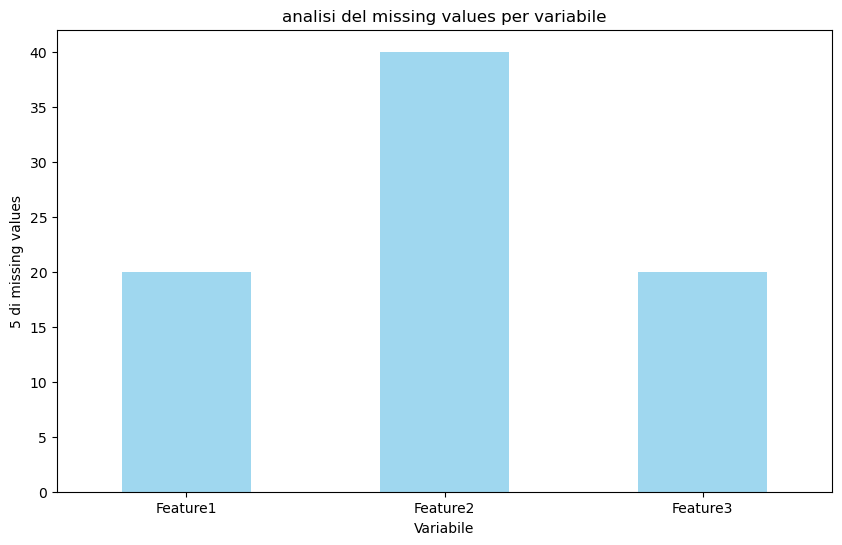

In [19]:
#Calcola la percentuale di righe con missing values per ciascuna variabile
missing_percent= (df.isnull().sum()) / len(df) * 100

#crea il grafico a barre
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar', color='skyblue', alpha=0.8)
plt.xlabel('Variabile')
plt.ylabel('5 di missing values')
plt.title('analisi del missing values per variabile')
plt.xticks(rotation=0)
plt.show()

### le heatmap

le heatmap sono usate per avere una visione a matrice dei dati mancanti, anche molto utile per sapere a "colpo dd'occhio" quanto il dataframe sia completo e di qualità

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

# Calcola la matrice di missing values
missing_matrix = df.isnull()
missing_matrix

Feature1  Feature2  Feature3
0     False      True     False
1     False     False      True
2      True     False     False
3     False     False     False
4     False      True     False

1. Dopo la creazione o importazione di un dataframe andiamo a creare un'heatmap utilizzando seaborn

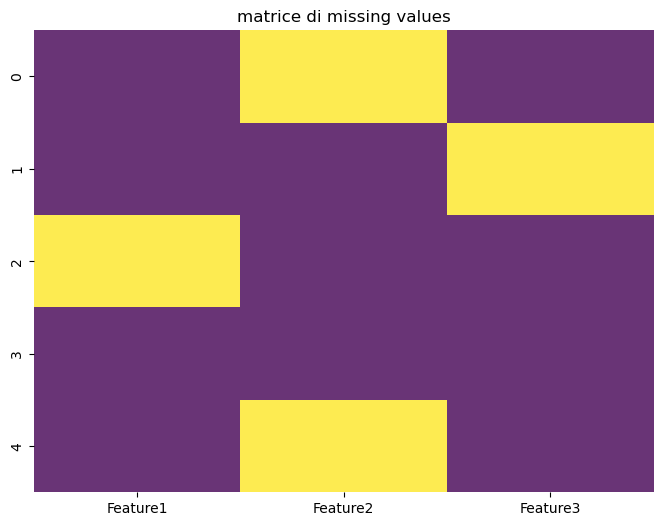

In [21]:
#crea heatmap colorata
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('matrice di missing values')
plt.show()

2. asseggnamo dei valori e una palette a questa heatmap

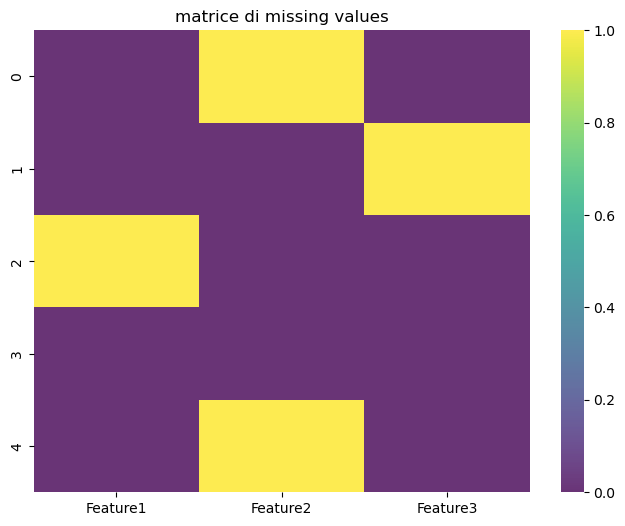

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=True,alpha=0.8)
plt.title('matrice di missing values')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 70, size=1000),
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),
    'Punteggio': np.random.uniform(0, 100, size=1000),
    'Reddito': np.random.normal(50000, 15000, size=1000) #distribuzione gaussiana
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())

   Età   Genere  Punteggio       Reddito
0   56  Maschio  85.120691  52915.764524
1   69  Maschio  49.514653  44702.505608
2   46  Maschio  48.058658  55077.257652
3   32  Femmina  59.240778  45568.978848
4   60  Maschio  82.468097  52526.914644


In [24]:
#informazioni sul dataset 
print(df.info())

#statistiche desrittive
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Età        1000 non-null   int64  
 1   Genere     1000 non-null   object 
 2   Punteggio  1000 non-null   float64
 3   Reddito    1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB
None
              Età    Punteggio       Reddito
count  1000.00000  1000.000000   1000.000000
mean     43.81900    50.471078  50241.607607
std      14.99103    29.014970  14573.000585
min      18.00000     0.321826   4707.317663
25%      31.00000    24.690382  40538.177863
50%      44.00000    51.789520  50099.165858
75%      56.00000    75.549365  60089.683773
max      69.00000    99.941373  97066.228005


In [25]:
#gesione valori mancanti
missing_data = df.isnull().sum()
print('valori mancanti per ciascuna colonna: ')
print(missing_data)

valori mancanti per ciascuna colonna: 
Età          0
Genere       0
Punteggio    0
Reddito      0
dtype: int64


#### il procedimento è lo stesso del precedente, tranne che in questo caso non ci sono valori mancanti

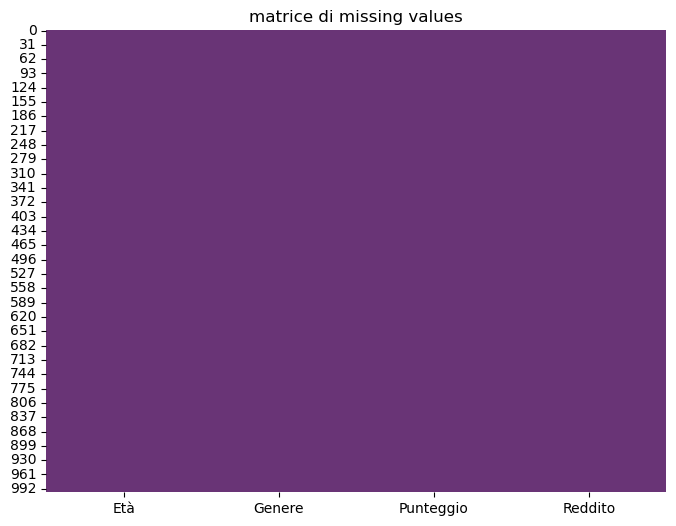

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False,alpha=0.8)
plt.title('matrice di missing values')
plt.show()

### visualizzazione della distribuzione

###### tramite istogramma

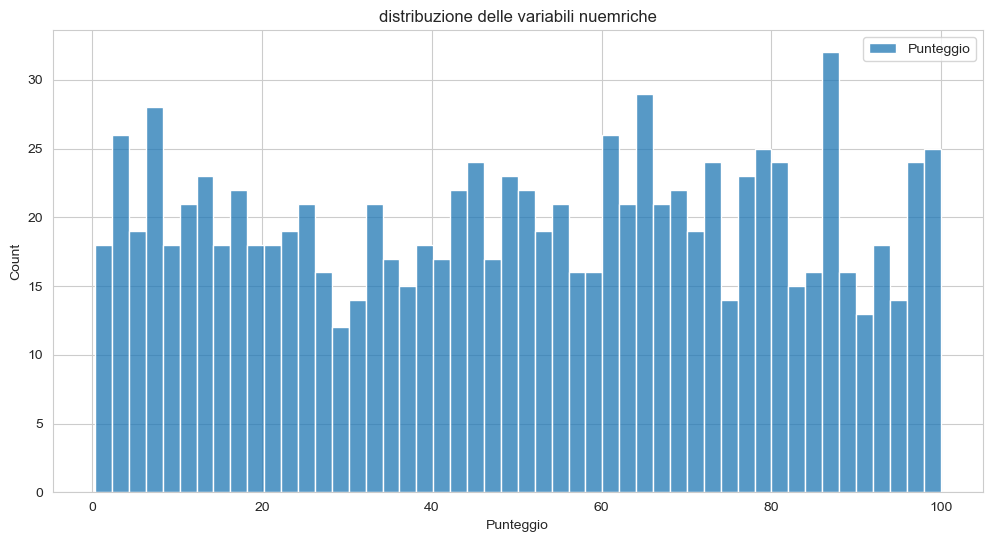

In [27]:
#visualizza la distribuzione dele varibaili numeriche

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.histplot(df['Punteggio'], kde=False, bins=50, label='Punteggio') #istogramma
plt.legend()
plt.title('distribuzione delle variabili nuemriche')
plt.show()

In [28]:
#visualizza una matrice di scatter plot tra le variabili numeriche
numeriche_features = df.select.dtypes(include=[np.number])
sns.pairplot(df[numeric.columns])
plt.title("matrice di scatter plot fra variabili numeriche")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'select'

###### tramite box plot

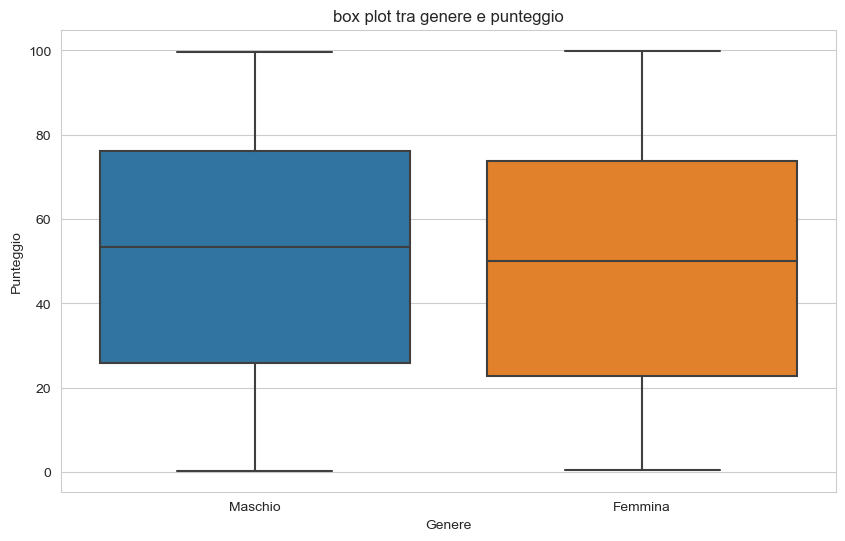

In [29]:
#visualizza una box plot per una variabile numerica rispetto a un
plt.figure(figsize=(10,6))
sns.boxplot(x='Genere',y='Punteggio', data=df)
plt.title('box plot tra genere e punteggio')
plt.show()

# I grafici intereattivi

In [30]:
#visualizza un grafico a dispersione interattivo utilizzando platly
import plotly.express as px
fig = px.scatter(df, x='Età', y='Reddito', color='Genere', size='Punteggio')
fig.update_layout(title='Grafico a dispersione interattivo')
fig.show()

1. inizializziamo il dataframe

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Data': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'), #data casuale
    'Vendite': np.random.randint(100, 1000, size=365), #100 numeri casuali tra1 100 e 1000
    'Prodotto': np.random.choice(['A', 'B', 'C'], size=365) #
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())


        Data  Vendite Prodotto
0 2023-01-01      202        B
1 2023-01-02      535        A
2 2023-01-03      960        C
3 2023-01-04      370        A
4 2023-01-05      206        A


2. facciamo un analisi tramite grafico a linee o a box (o quello che si più addice ai dati)

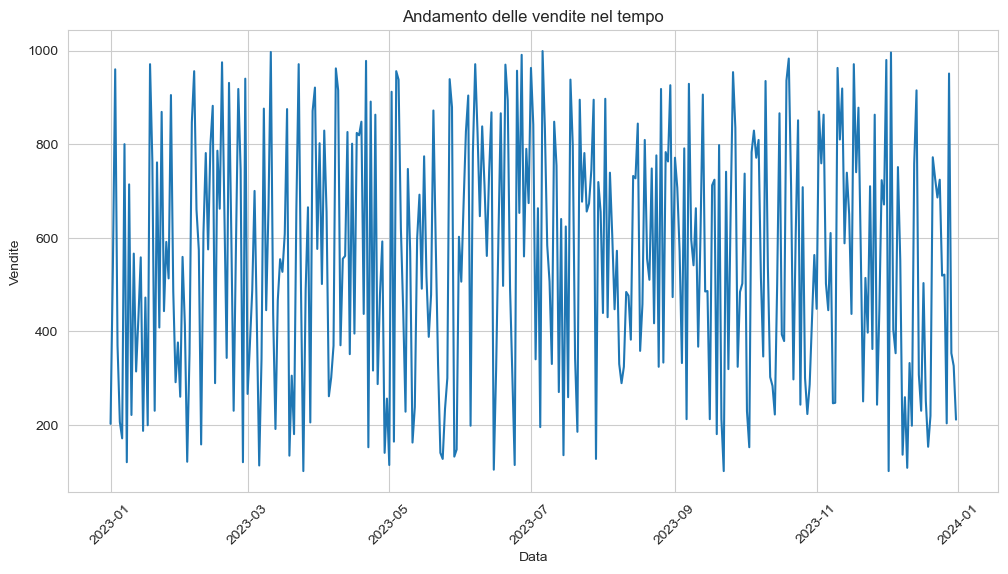

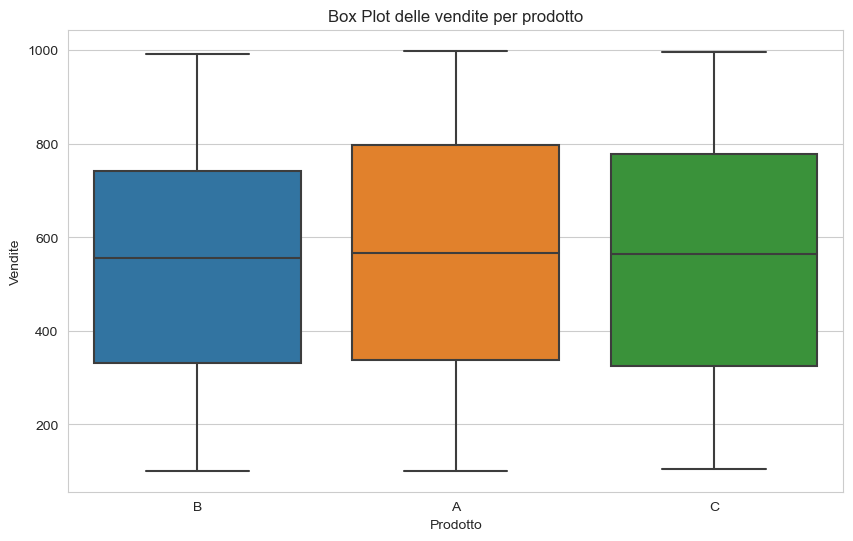

In [32]:

# Visualizza un grafico delle vendite nel tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Vendite', data=df)
plt.title('Andamento delle vendite nel tempo')
plt.xlabel('Data')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.show()

# Visualizza una box plot delle vendite per prodotto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prodotto', y='Vendite', data=df)
plt.title('Box Plot delle vendite per prodotto')
plt.xlabel('Prodotto')
plt.ylabel('Vendite')
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Genera dati di esempio
data = {
    'Numeric_Var': [1, 2, 3, 4, np.nan, 6],
    'Categorical_Var': ['A', 'B', 'A', 'B', 'A', 'B']
}

# Crea un DataFrame
df = pd.DataFrame(data)
print(df)

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          NaN               A
5          6.0               B


   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          2.0               A
5          6.0               B


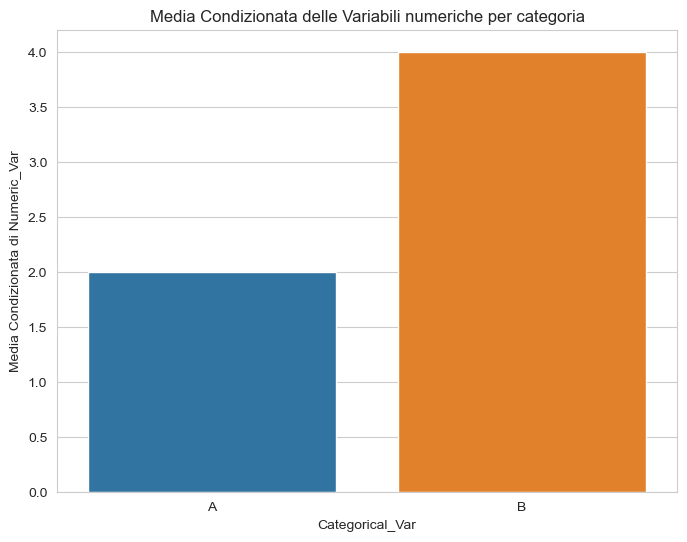

In [34]:
#calcola la media condizionata
conditional_means = df['Numeric_Var'].fillna(df.groupby('Categorical_Var')['Numeric_Var'].transform('mean'))

#aggiorna la colonna numeric_var con la media condizionata
df['Numeric_Var'] = conditional_means
print(df)

#crea un graico a barre per mostrare la sedia condizionata per ogni categoria
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Categorical_Var', y='Numeric_Var', errorbar=None) #errorbar = ci (confident interval)
plt.xlabel('Categorical_Var')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili numeriche per categoria')
plt.show()

     Età        Soddisfazione
0     56    Molto Soddisfatto
1     46  Molto Insoddisfatto
2     32               Neutro
3     60               Neutro
4     25  Molto Insoddisfatto
..   ...                  ...
495   37    Molto Soddisfatto
496   41    Molto Soddisfatto
497   29    Molto Soddisfatto
498   52    Molto Soddisfatto
499   50    Molto Soddisfatto

[500 rows x 2 columns]
     Età        Soddisfazione  Numeric_Var
0     56    Molto Soddisfatto    41.651376
1     46  Molto Insoddisfatto    40.054054
2     32               Neutro    41.747368
3     60               Neutro    41.747368
4     25  Molto Insoddisfatto    40.054054
..   ...                  ...          ...
495   37    Molto Soddisfatto    41.651376
496   41    Molto Soddisfatto    41.651376
497   29    Molto Soddisfatto    41.651376
498   52    Molto Soddisfatto    41.651376
499   50    Molto Soddisfatto    41.651376

[500 rows x 3 columns]


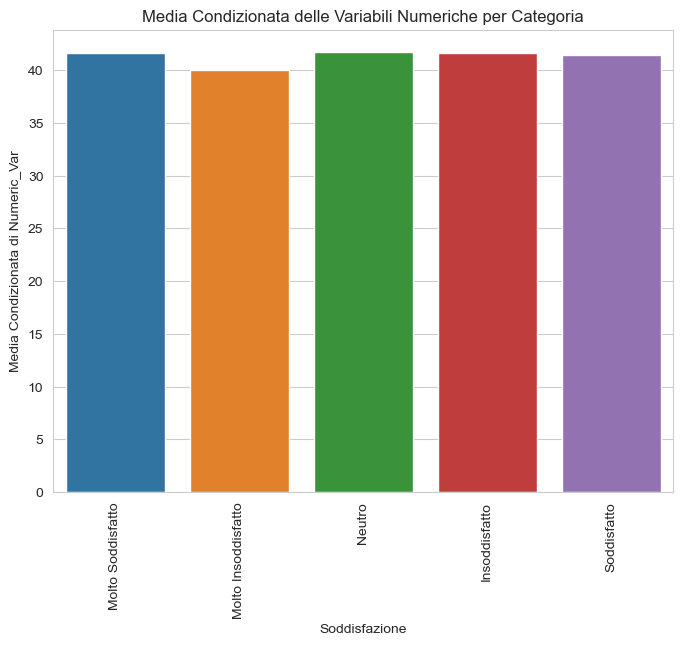

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 65, size=500),
    'Soddisfazione': np.random.choice(['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'], size=500)
}

df = pd.DataFrame(data)
print(df)
conditional_means = df.groupby('Soddisfazione')['Età'].transform('mean')

df['Numeric_Var'] = conditional_means
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Soddisfazione', y='Numeric_Var', errorbar=None)
plt.xlabel('Soddisfazione')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili Numeriche per Categoria')
plt.xticks(rotation=90)

plt.show()

   Età        Soddisfazione  Numeric_Var
0   56    Molto Soddisfatto    41.651376
1   46  Molto Insoddisfatto    40.054054
2   32               Neutro    41.747368
3   60               Neutro    41.747368
4   25  Molto Insoddisfatto    40.054054


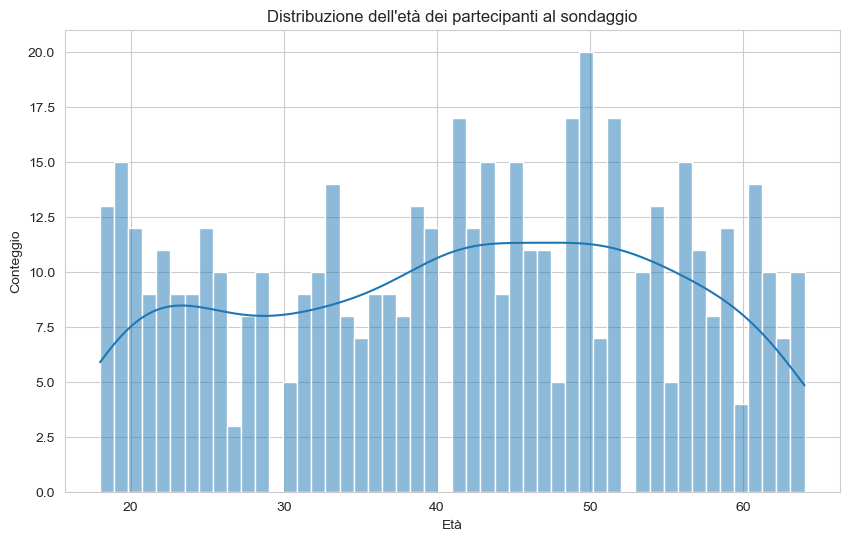

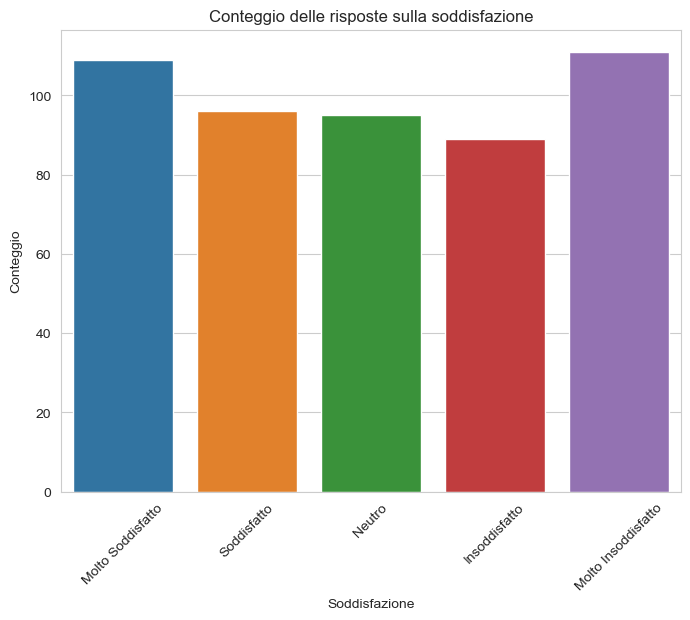

In [36]:
# Visualizza le prime righe del dataset
print(df.head())

# Visualizza una distribuzione dell'età
plt.figure(figsize=(10, 6))
sns.histplot(df['Età'], bins=50, kde=True)
plt.title('Distribuzione dell\'età dei partecipanti al sondaggio')
plt.xlabel('Età')
plt.ylabel('Conteggio')
plt.show()

# Visualizza un conteggio delle risposte sulla soddisfazione
plt.figure(figsize=(8, 6))
sns.countplot(x='Soddisfazione', data=df, order=['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'])
plt.title('Conteggio delle risposte sulla soddisfazione')
plt.xlabel('Soddisfazione')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

/var/folders/hm/gkr5jwq528304nzg_2t2dgq00000gn/T/ipykernel_1347/1612240019.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



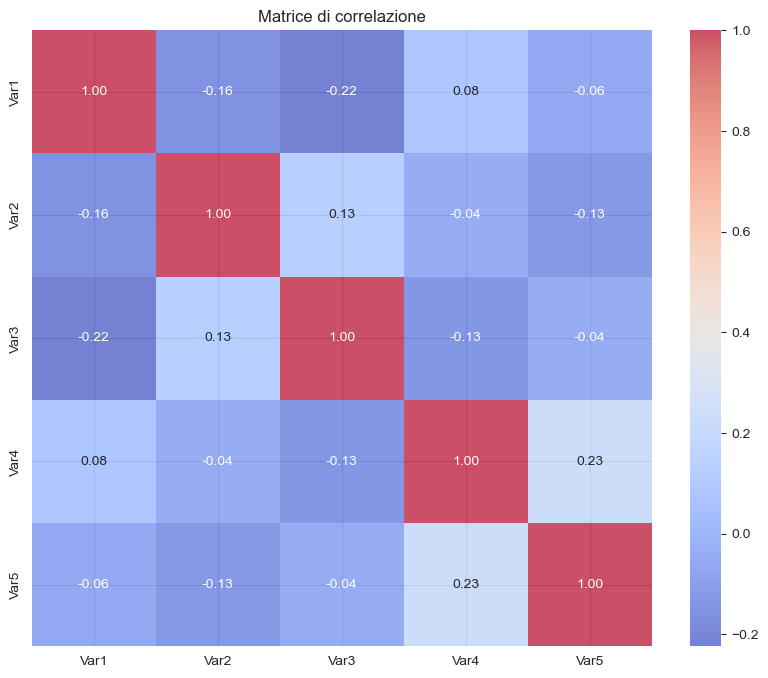

In [43]:
## import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genera un dataset di esempio con variabili numeriche
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])

# Aggiungi alcune variabili categoriche generate casualmente
data['Categoria1'] = np.random.choice(['A', 'B', 'C'], size=100)
data['Categoria2'] = np.random.choice(['X', 'Y'], size=100)

#calcola la matrice di correlazione tra tutte le variabili numerici (correlazione = )
correlation_matrix = data.corr()

#visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", alpha=0.7)

plt.title('Matrice di correlazione')
plt.show()

In [49]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.03 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan
df

CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
1          A       Y  1.945879     28.0  0.936825
2          C       X  0.988834     42.0  0.751516
3          A       Y -0.181978     73.0  0.950696
4          B       X  2.080615     74.0  0.903045
...      ...     ...       ...      ...       ...
9995       C       Y  1.352114     61.0  0.728445
9996       C       Y  1.143642     67.0  0.605930
9997       A       X -0.665794     54.0  0.071041
9998       C       Y  0.004278      NaN       NaN
9999       A       X  0.622473     95.0  0.751384

[10000 rows x 5 columns]

In [53]:
#identificazione delle righe con dati mancati
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
len(righe_con_dati_mancanti)

3648

In [54]:
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent

CatCol1     0.29
CatCol2    10.63
NumCol1     9.67
NumCol2    10.48
NumCol3    12.69
dtype: float64

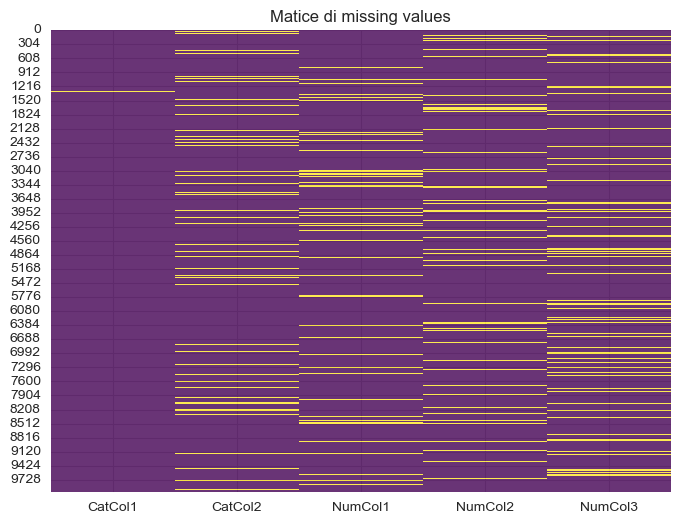

In [56]:
missing_matrix = df.isnull()
#crea una heatmap colorata
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matice di missing values')
plt.show()